In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astroquery.mast import Catalogs
from astropy.stats import sigma_clip
from astropy.timeseries import LombScargle



In [6]:
## searching our star from catalog
star_info = Catalogs.query_object("GJ 1243", catalog="TIC")



In [21]:
star_info[:-1][0] #row where we have all information of the star

ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,POSflag,e_pmRA,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
str11,float64,float64,float64,float64,float64,str8,str7,str8,str1,str12,str10,str17,str1,str19,str19,str8,str7,str8,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str9,str11,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str8,str8,str13,float64,float64,float64,float64,float64,float64,int64,int64,float64
273589987,297.788835531591,46.4833913684977,183.293,266.019,10.2463,STAR,tmgaia2,20190415,--,--,683-075562,19510930+4628598,--,--,2080285727861817088,53740263,9726699,tmgaia2,0.0661744,0.0724241,gaia2,83.4814,0.0365802,gaia2,80.4403433998879,9.9500669924854,319.888829438273,65.1815416218027,14.61,0.034,12.961,0.188,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.586,0.023,8.045,0.02,7.773,0.016,AAA-111-111-000-0-0,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.5509,0.000682,0.0073089,cdwrf,cdwrf,3261.0,157.0,4.96237,0.010565,nan,nan,0.268565,0.00793844,0.241211,0.0200852,12.4523,0.0651164,DWARF,0.00734846666,0.00186014641,11.9746,0.0053,0.0,0.0,696,0.108853377,--,--,0.0206394363,0.0,0.0,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,bj2018,nan,nan,cdwrf,13.1684,0.002633,10.3313,0.001195,1,--,cdwrf,apassdr9,cooldwarfs_v8,1.11672161520925,1.12316238242926,297.789981652018,46.4845367338129,0.0307958598867541,0.0363642976635993,1,0,0.0049360234242504745


In [29]:
## temperature, distance, mass, radius 
star_temperature, star_distance, star_mass,star_radius = star_info["Teff"][0],star_info["d"][0],star_info["mass"][0],star_info["rad"][0]
print(f"star temperature {star_temperature}\n star distance {star_distance}\n star mass {star_mass}\n star radius {star_radius} ") 

star temperature 3261.0
 star distance 11.9746
 star mass 0.241211
 star radius 0.268565 


In [35]:
#searching lightcurve from my star
search_lightcurve = lk.search_lightcurve('TIC 273589987', mission='TESS', sector=14, exptime = 120)
search_lightcurve


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,273589987,0.0
1,TESS Sector 14,2019,TASOC,120,273589987,0.0


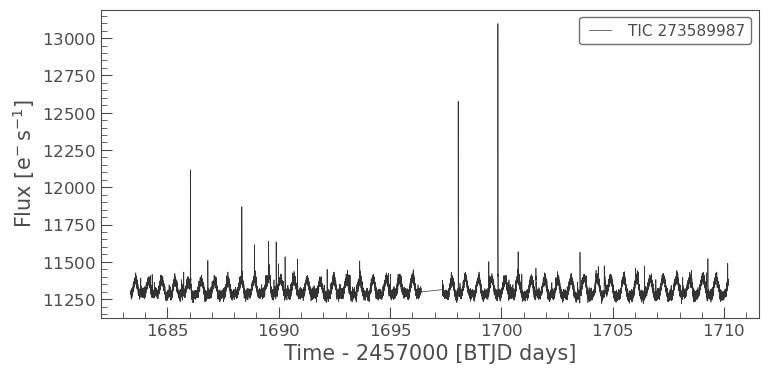

In [47]:
## download lightcurve
lc = search_lightcurve[0].download()
lc.plot()
plt.show()

In [53]:
lc


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1683.3561529838314,1.1284656e+04,1.4251249e+01,2.2327721e-03,328247,827.91772,842.45962,1.0696359e+04,1.2240940e+01,1.3084390e+03,3.4242630e+00,1.1284656e+04,1.4251249e+01,0,———,———,———,———,827.91772,7.8834803e-04,842.45962,8.7252853e-04,-1.6942209e-02,-4.6222195e-02
1683.3575418921516,1.1300812e+04,1.4251861e+01,2.2327921e-03,328248,827.91860,842.45808,1.0708843e+04,1.2241465e+01,1.3015626e+03,3.4173162e+00,1.1300812e+04,1.4251861e+01,0,———,———,———,———,827.91860,7.8857446e-04,842.45808,8.7131793e-04,-1.5412522e-02,-4.6145760e-02
1683.3589308007051,1.1299353e+04,1.4258338e+01,2.2328123e-03,328249,827.91578,842.45856,1.0707478e+04,1.2247029e+01,1.3087590e+03,3.4237120e+00,1.1299353e+04,1.4258338e+01,0,———,———,———,———,827.91578,7.8746676e-04,842.45856,8.7328046e-04,-1.8548727e-02,-4.7316205e-02
1683.3603197092577,1.1295824e+04,1.4251743e+01,2.2328326e-03,328250,827.91417,842.45742,1.0708233e+04,1.2241364e+01,1.3031998e+03,3.4201446e+00,1.1295824e+04,1.4251743e+01,0,———,———,———,———,827.91417,7.8727305e-04,842.45742,8.7216083e-04,-2.0365570e-02,-5.0206997e-02
1683.3617086175773,1.1281124e+04,1.4252199e+01,2.2328526e-03,328251,827.91584,842.46291,1.0696465e+04,1.2241756e+01,1.3079729e+03,3.4224558e+00,1.1281124e+04,1.4252199e+01,0,———,———,———,———,827.91584,7.8846159e-04,842.46291,8.7254122e-04,-2.0553343e-02,-4.3092389e-02
1683.3630975258977,1.1289905e+04,1.4255776e+01,2.2328726e-03,328252,827.91684,842.46310,1.0706306e+04,1.2244829e+01,1.3065746e+03,3.4228601e+00,1.1289905e+04,1.4255776e+01,0,———,———,———,———,827.91684,7.8792020e-04,842.46310,8.7173632e-04,-1.8217841e-02,-4.3031115e-02
1683.3644864344508,1.1299105e+04,1.4257864e+01,2.2328929e-03,328253,827.91421,842.45908,1.0701908e+04,1.2246622e+01,1.3062257e+03,3.4228430e+00,1.1299105e+04,1.4257864e+01,0,———,———,———,———,827.91421,7.8939751e-04,842.45908,8.7321753e-04,-2.0982368e-02,-4.9291022e-02
1683.3658753427715,1.1284609e+04,1.4248456e+01,2.2329129e-03,328254,827.91441,842.46008,1.0703349e+04,1.2238541e+01,1.3013702e+03,3.4176686e+00,1.1284609e+04,1.4248456e+01,0,———,———,———,———,827.91441,7.8878464e-04,842.46008,8.7171816e-04,-2.1124538e-02,-4.5857053e-02


In [51]:
#we move the information to a csv table
light_curve = lc.to_table()
light_curve.write("TIC273589987_sector14_spoc.csv", format="csv", overwrite=True)

In [122]:
#asignation to flux and time
flux, flux_error, time = lc.pdcsap_flux.value,lc.pdcsap_flux_err, lc.time.value

In [113]:
#check rhe quality of the data 
quality = lc["quality"]
quality
mask = (quality == 0)
time_clean = time[mask]
flux_clean = flux[mask]
flux_error_clean = flux_error[mask]


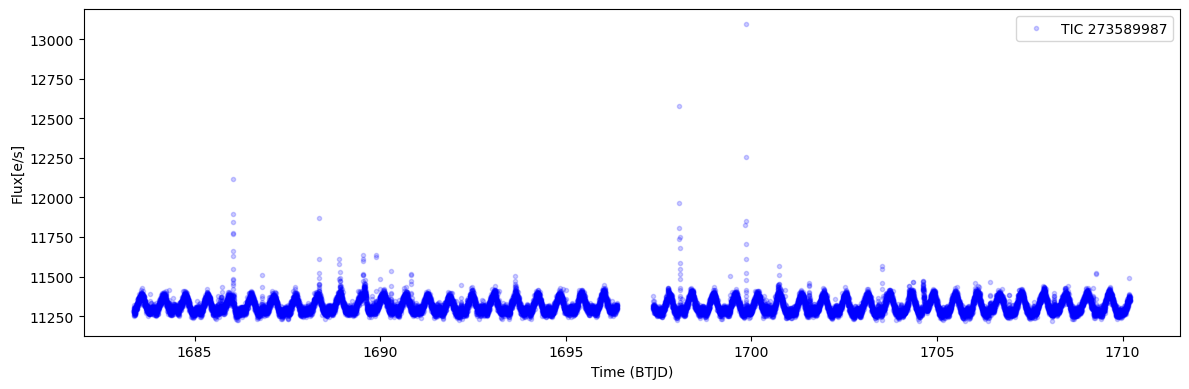

In [114]:
#plotting raw data (pdcsap_flux)
plt.figure(figsize=(12,4))
plt.plot(time, flux, '.', alpha=0.2, color = "blue", label="TIC 273589987")
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux[e/s]")
plt.legend()
plt.tight_layout()
plt.show()


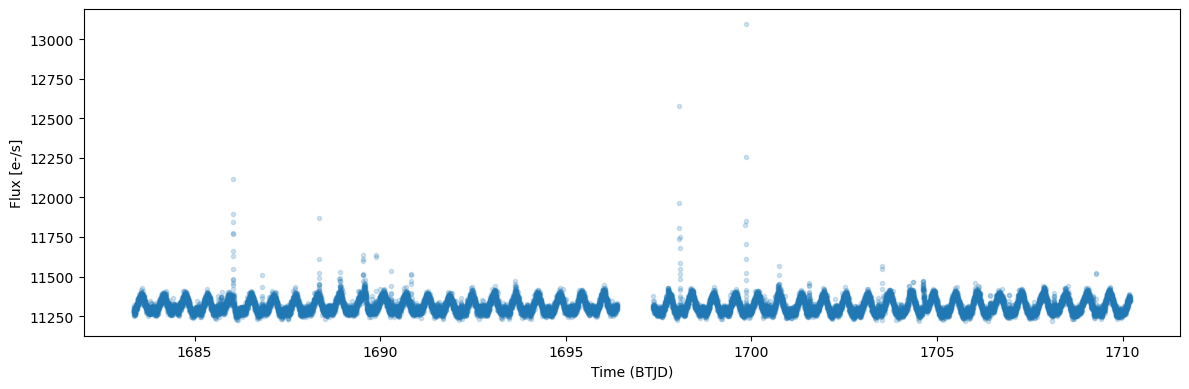

In [115]:
#plotting quality data()
plt.figure(figsize=(12,4))
plt.plot(time_clean, flux_clean, '.', alpha=0.2)
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux [e-/s]")
plt.tight_layout()
plt.show()



In [116]:
#counting bad and good  flags
total = len(flux)
good = np.sum(quality == 0)
bad = np.sum(quality != 0)

print("Total:", total)
print("good:", good)
print("bads:", bad)


Total: 18424
good: 18409
bads: 15


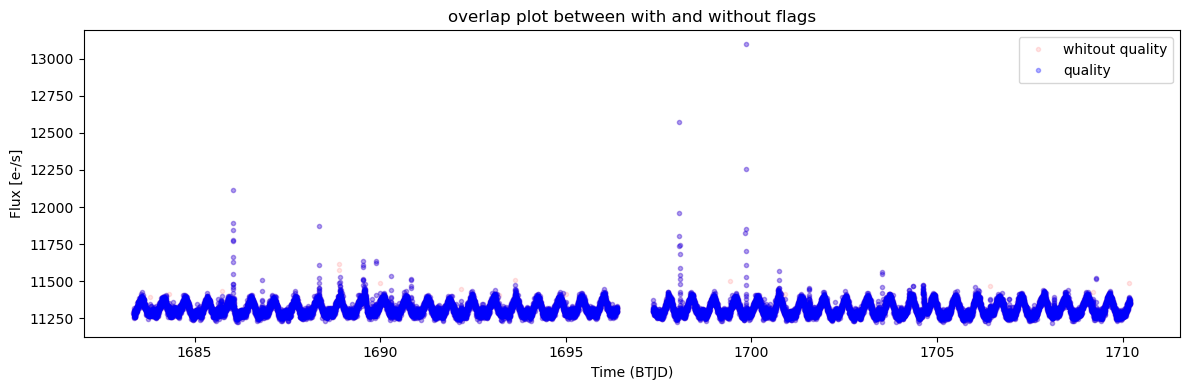

In [118]:
#overlap plot between with and without flags
plt.figure(figsize=(12,4))
plt.plot(time, flux, '.', alpha=0.1,color ="red", label="whitout quality")
plt.plot(time_clean, flux_clean, '.', alpha=0.3, color="blue", label="quality")
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux [e-/s]")
plt.title("overlap plot between with and without flags")
plt.legend()
plt.tight_layout()
plt.show()


In [109]:
## looking for Nan in clean data
print("NaN in time:", np.sum(~np.isfinite(time_clean)))
print("NaN in flux:", np.sum(~np.isfinite(flux_clean)))


NaN in time: 0
NaN in flux: 0


In [141]:
## outliers
# Inputsnumpy arrays)
time_arr = np.asarray(time_clean)            # days (BTJD)
flux_arr = np.asarray(flux_clean)            # e-/s (sin units)
ferr_arr  = np.asarray(flux_error_clean)
# 2) Detectar outliers con sigma_clip (conservador)
sigma_detect = 5.0           # conservador; baja a 3.0 si querés más agresivo
clip = sigma_clip(flux_arr, sigma=sigma_detect, maxiters=5, cenfunc='median', stdfunc='std')
outlier_mask = clip.mask     # True = outlier
print("Outliers detected (mask True):", np.sum(outlier_mask))


Outliers detected (mask True): 35


In [156]:
# Máscara de puntos buenos
good_mask = ~outlier_mask   # True = datos buenos

# Filtrar time, flux, flux_error
time_no_outliers  = time_arr[good_mask]
flux_no_outliers  = flux_arr[good_mask]
ferr_no_outliers  = ferr_arr[good_mask]

print("Original:", len(time_arr))
print("after eliminate outliers:", len(time_no_outliers))
print("Eliminates:", np.sum(outlier_mask))


Original: 18409
after eliminate outliers: 18374
Eliminates: 35


In [162]:
len(time_no_outliers) == len(flux_no_outliers) == len(ferr_no_outliers) #"time, flux, flux_err same length"


True

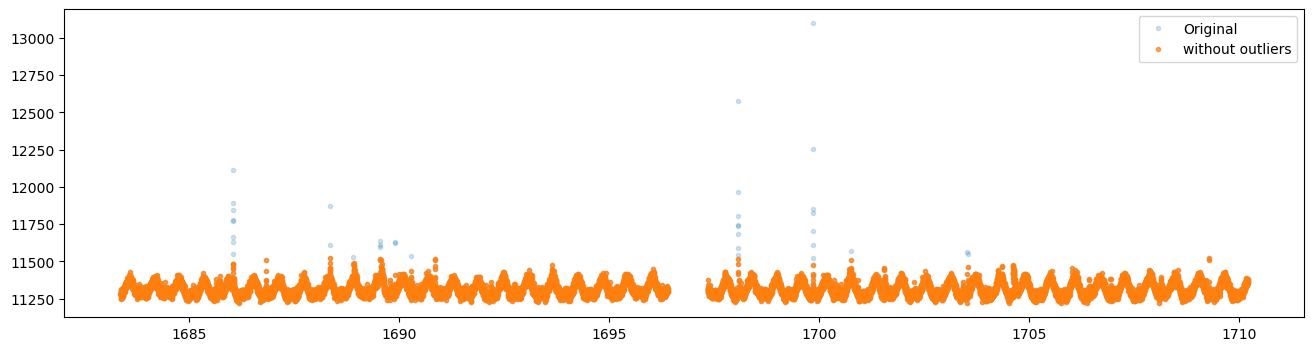

In [160]:
plt.figure(figsize=(16,4))
plt.plot(time_arr, flux_arr, '.', alpha=0.2, label='Original')
plt.plot(time_no_outliers, flux_no_outliers, '.', alpha=0.7, label='without outliers')
plt.legend()
plt.show()


S/N mean: 755.9788
S/N median: 761.1039
S/N minimun: 696.0689
S/N maximun: 804.1289


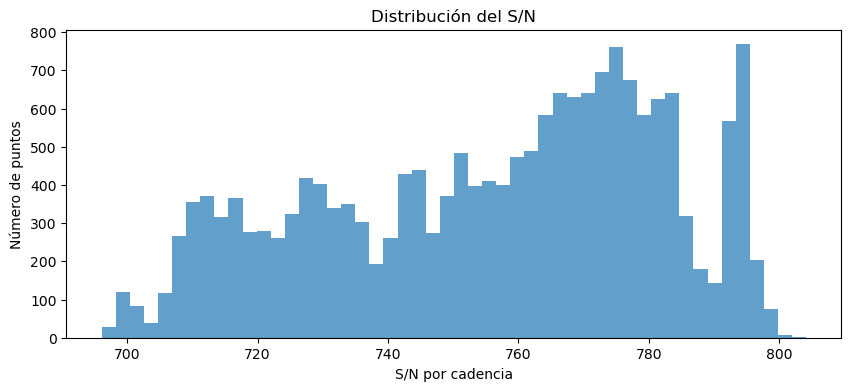

In [163]:
## calculate the S/N
snr = flux_no_outliers / ferr_no_outliers
print("S/N mean:", np.mean(snr))
print("S/N median:", np.median(snr))
print("S/N minimun:", np.min(snr))
print("S/N maximun:", np.max(snr))
snr_array = np.array(snr)
plt.figure(figsize=(10,4))
plt.hist(snr_array, bins=50, alpha=0.7)
plt.xlabel("S/N por cadencia")
plt.ylabel("Número de puntos")
plt.title("Distribución del S/N")
plt.show()


Periodo mejor estimado: 0.5925078377893138 días
FAP: 0.0


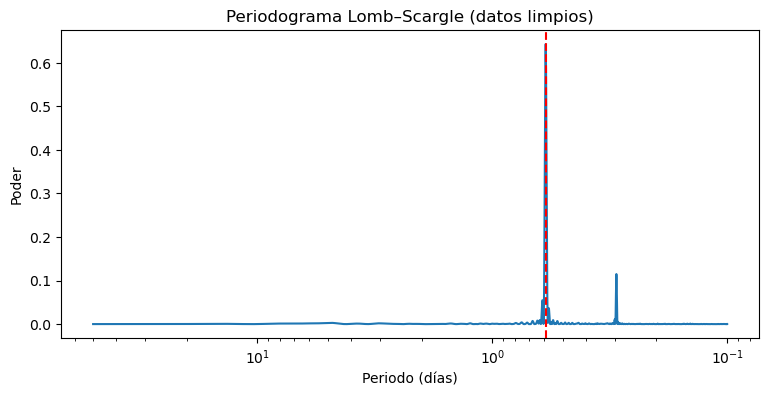

In [166]:



# --- Rango de periodos ---
minP, maxP = 0.1, 50.0
minF, maxF = 1/maxP, 1/minP

# --- Lomb–Scargle ---
Nf = 20000
freq = np.linspace(minF, maxF, Nf)
ls = LombScargle(time_no_outliers, flux_no_outliers, ferr_no_outliers)
power = ls.power(freq)

best_idx = np.argmax(power)
best_freq = freq[best_idx]
best_period = 1.0 / best_freq

print("Periodo mejor estimado:", best_period, "días")

# --- Significancia ---
fap = ls.false_alarm_probability(power[best_idx])
print("FAP:", fap)

# --- Gráfico ---
periods = 1/freq
plt.figure(figsize=(9,4))
plt.plot(periods, power)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.axvline(best_period, color="red", linestyle="--")
plt.xlabel("Periodo (días)")
plt.ylabel("Poder")
plt.title("Periodograma Lomb–Scargle (datos limpios)")
plt.show()


In [169]:
flux_norm = flux_no_outliers/ np.median(flux_no_outliers)
flux_norm

array([0.99826735, 0.9996966 , 0.99956745, ..., 1.0059263 , 1.0066947 ,
       1.004285  ], shape=(18374,), dtype=float32)

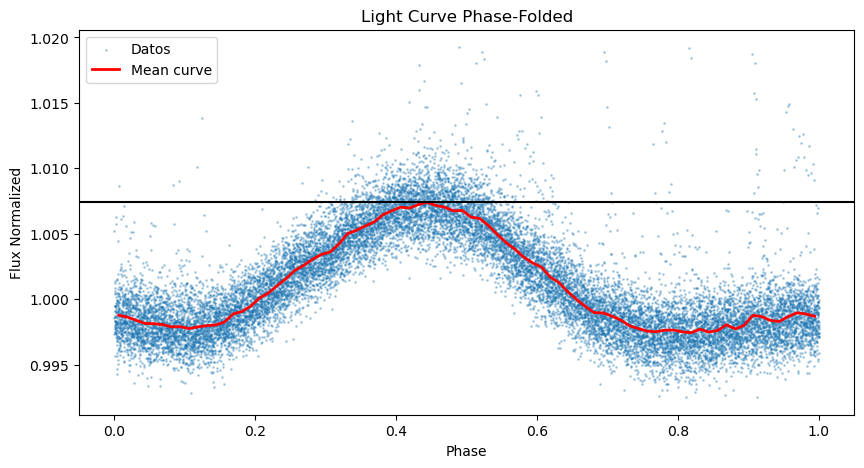

Amplitud máxima: 1.0074167


In [174]:
# 1) Phase
phase = (time_no_outliers / best_period) % 1

# 2) Ordenar
order = np.argsort(phase)
phase_sorted = phase[order]
flux_sorted  = flux_norm[order]
#flux_sorted  = flux_no_outliers[order]

# 3) Binning
Nbins =80
bins = np.linspace(0, 1, Nbins+1)
bin_idx = np.digitize(phase_sorted, bins)

phase_mean = []
flux_mean = []

for i in range(1, Nbins+1):
    mask = bin_idx == i
    if np.sum(mask) > 0:
        phase_mean.append(np.mean(phase_sorted[mask]))
        flux_mean.append(np.mean(flux_sorted[mask]))

phase_mean = np.array(phase_mean)
flux_mean  = np.array(flux_mean)
max_amplitude = np.max(flux_mean)
# 4) Plot
plt.figure(figsize=(10,5))
plt.scatter(phase_sorted, flux_sorted, s=1, alpha=0.3, label="Datos")
plt.plot(phase_mean, flux_mean, color="red", lw=2, label="Mean curve")
plt.axhline(max_amplitude, color="k")
plt.xlabel("Phase")
plt.ylabel("Flux Normalized")
plt.title("Light Curve Phase-Folded")
plt.legend()
plt.show()

# 5) Amplitud

print("Amplitud máxima:", max_amplitude)


In [175]:
# --- Filtrar por rango ---
mask = (time_no_outliers >= 1705) & (time_no_outliers <= 1708)

time_slice = time_no_outliers[mask]
flux_slice = flux_norm[mask]

# --- Guardar en un CSV ---
df = pd.DataFrame({
    "Time": time_slice,
    "flux_normalized": flux_slice
})

df.to_csv("lightcurve_1705_1708.csv", index=False)

print("Listo! Archivo generado: lightcurve_1705_1708.csv")
print(df.head())
print(f"Total de puntos guardados: {len(df)}")

Listo! Archivo generado: lightcurve_1705_1708.csv
          Time  flux_normalized
0  1705.000781         1.000820
1  1705.002170         1.001368
2  1705.003559         1.001293
3  1705.004948         1.000981
4  1705.006337         1.004491
Total de puntos guardados: 2132
